In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ghouls-goblins-and-ghosts-boo/train.csv.zip
/kaggle/input/ghouls-goblins-and-ghosts-boo/sample_submission.csv.zip
/kaggle/input/ghouls-goblins-and-ghosts-boo/test.csv.zip


# Ghouls, Goblins, and Ghosts... Boo!

Bu projede özellikleri verilen Hortlak, Hayalet ve Cin sınıflandırması yapıyoruz.

Bu çalışmada kullanılan verilere [buradan](https://www.kaggle.com/c/ghouls-goblins-and-ghosts-boo/overview) ulaşılabilir.

<img src="https://storage.googleapis.com/kaggle-media/competitions/kaggle/5708/media/halloween-660x.png">

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv("/kaggle/input/ghouls-goblins-and-ghosts-boo/train.csv.zip")
test=pd.read_csv("/kaggle/input/ghouls-goblins-and-ghosts-boo/test.csv.zip")

df.head()

,id,bone_length,rotting_flesh,hair_length,has_soul,color,type
0,0,0.354512,0.350839,0.465761,0.781142,clear,Ghoul
1,1,0.575560,0.425868,0.531401,0.439899,green,Goblin
2,2,0.467875,0.354330,0.811616,0.791225,black,Ghoul
3,4,0.776652,0.508723,0.636766,0.884464,black,Ghoul
4,5,0.566117,0.875862,0.418594,0.636438,green,Ghost


<Axes: xlabel='type', ylabel='count'>

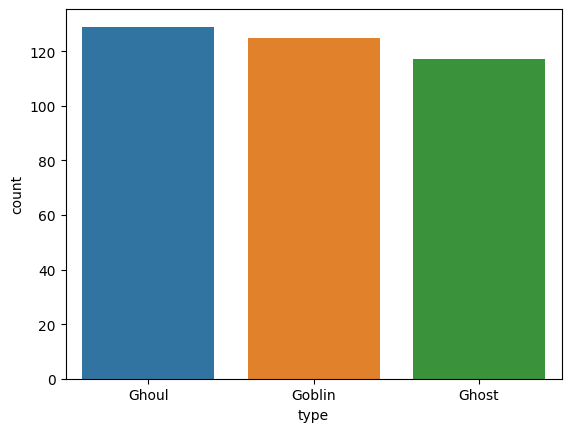

In [11]:
sns.countplot(x=df["type"])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             371 non-null    int64  
 1   bone_length    371 non-null    float64
 2   rotting_flesh  371 non-null    float64
 3   hair_length    371 non-null    float64
 4   has_soul       371 non-null    float64
 5   color          371 non-null    object 
 6   type           371 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 20.4+ KB


<Axes: xlabel='count', ylabel='color'>

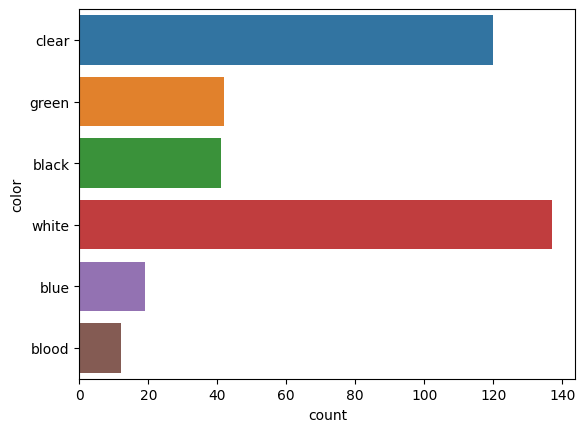

In [10]:
sns.countplot(y=df["color"])

In [12]:
df.type.unique()

array(['Ghoul', 'Goblin', 'Ghost'], dtype=object)

In [13]:
d={'Ghoul':0, 'Goblin':1, 'Ghost':2}
df["class"]=df["type"].map(d)
df.sample(10)

,id,bone_length,rotting_flesh,hair_length,has_soul,color,type,class
319,753,0.422322,0.673089,0.829372,0.577836,white,Ghoul,0
268,661,0.491710,0.463629,0.559444,0.435188,clear,Goblin,1
173,419,0.327031,0.608481,0.310469,0.356699,green,Ghost,2
314,745,0.417300,0.377595,0.541834,0.349087,clear,Goblin,1
191,470,0.471201,0.568542,0.515442,0.388791,black,Goblin,1
27,56,0.492438,0.623197,0.604879,0.376142,green,Goblin,1
304,729,0.757138,0.556602,0.760736,0.570260,black,Ghoul,0
127,300,0.387730,0.659535,0.356108,0.550968,green,Goblin,1
351,843,0.552971,0.341187,0.644801,0.415394,white,Goblin,1
29,62,0.304198,0.266904,0.527225,0.386713,clear,Goblin,1


## Modelleme

In [16]:
x=df.drop(["id", "type", "class"], axis=1)
y=df[["class"]]
x.shape, y.shape

((371, 5), (371, 1))

In [17]:
x=pd.get_dummies(x, drop_first=True)
x.shape

(371, 9)

In [35]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

g = GaussianNB()
b = BernoulliNB()
l = LogisticRegression()
d = DecisionTreeClassifier()
r = RandomForestClassifier()
gb= GradientBoostingClassifier()
kn= KNeighborsClassifier()

def algo_test(x, y):
    modeller=[g, b, l, d, r, gb, kn]
    isimler=["GaussianNB", "BernoulliNB", "LogisticRegression", "DecisionTreeClassifier", 
             "RandomForestClassifier", "GradientBoostingClassifier", "KNeighborsClassifier"]

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state = 42)
    
    accuracy = []
    precision = []
    recall = []
    f1 = []
    mdl=[]

    print("Veriler hazır modeller deneniyor")
    for model in modeller:
        print(model, " modeli eğitiliyor!..")
        model=model.fit(x_train,y_train)
        tahmin=model.predict(np.array(x_test) if model==kn else x_test)
        mdl.append(model)
        accuracy.append(accuracy_score(y_test, tahmin))
        precision.append(precision_score(y_test, tahmin, average="micro"))
        recall.append(recall_score(y_test, tahmin, average="micro"))
        f1.append(f1_score(y_test, tahmin, average="micro"))
        print(confusion_matrix(y_test, tahmin))

    print("Eğitim tamamlandı.")
    
    metrics=pd.DataFrame(columns=["Accuracy", "Precision", "Recall", "F1", "Model"], index=isimler)
    metrics["Accuracy"] = accuracy
    metrics["Precision"] = precision  
    metrics["Recall"] = recall
    metrics["F1"] = f1
    metrics["Model"]=mdl

    metrics.sort_values("F1", ascending=False, inplace=True)

    print("En başarılı model: ", metrics.iloc[0].name)
    model=metrics.iloc[0,-1]
    tahmin=model.predict(np.array(x_test) if model==kn else x_test)
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, tahmin))
    print("classification Report:")
    print(classification_report(y_test, tahmin))
    print("Diğer Modeller:")
    
    return metrics.drop("Model", axis=1)

In [36]:
algo_test(x,y)

Veriler hazır modeller deneniyor
GaussianNB()  modeli eğitiliyor!..
[[28 12  1]
 [ 4 28  4]
 [ 0 13 22]]
BernoulliNB()  modeli eğitiliyor!..
[[ 0 20 21]
 [ 0 17 19]
 [ 0 18 17]]
LogisticRegression()  modeli eğitiliyor!..
[[30  9  2]
 [ 8 23  5]
 [ 0  9 26]]
DecisionTreeClassifier()  modeli eğitiliyor!..
[[29 11  1]
 [ 6 26  4]
 [ 2  8 25]]
RandomForestClassifier()  modeli eğitiliyor!..


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/tmp/ipykernel_34/3015561559.py:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model=model.fit(x_

[[30  9  2]
 [ 6 27  3]
 [ 0  9 26]]
GradientBoostingClassifier()  modeli eğitiliyor!..


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[27 12  2]
 [ 6 25  5]
 [ 0  7 28]]
KNeighborsClassifier()  modeli eğitiliyor!..
[[28 11  2]
 [10 21  5]
 [ 1  9 25]]
Eğitim tamamlandı.
En başarılı model:  RandomForestClassifier
Confusion Matrix:
[[30  9  2]
 [ 6 27  3]
 [ 0  9 26]]
classification Report:
              precision    recall  f1-score   support

           0       0.83      0.73      0.78        41
           1       0.60      0.75      0.67        36
           2       0.84      0.74      0.79        35

    accuracy                           0.74       112
   macro avg       0.76      0.74      0.74       112
weighted avg       0.76      0.74      0.75       112

Diğer Modeller:


/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


,Accuracy,Precision,Recall,F1
RandomForestClassifier,0.741071,0.741071,0.741071,0.741071
DecisionTreeClassifier,0.714286,0.714286,0.714286,0.714286
GradientBoostingClassifier,0.714286,0.714286,0.714286,0.714286
LogisticRegression,0.705357,0.705357,0.705357,0.705357
GaussianNB,0.696429,0.696429,0.696429,0.696429
KNeighborsClassifier,0.660714,0.660714,0.660714,0.660714
BernoulliNB,0.303571,0.303571,0.303571,0.303571


In [37]:
rf=RandomForestClassifier()
model=rf.fit(x,y)

/tmp/ipykernel_34/3469201884.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model=rf.fit(x,y)


In [39]:
x=test.drop(["id"], axis=1)
x.head()

,bone_length,rotting_flesh,hair_length,has_soul,color
0,0.471774,0.387937,0.706087,0.698537,black
1,0.427332,0.645024,0.565558,0.451462,white
2,0.549602,0.491931,0.660387,0.449809,black
3,0.638095,0.682867,0.471409,0.356924,white
4,0.361762,0.583997,0.377256,0.276364,black


In [40]:
x=pd.get_dummies(x, drop_first=True)
x.shape

(529, 9)

In [41]:
pred=model.predict(x)

In [42]:
pred

array([0, 1, 0, 2, 2, 2, 0, 1, 1, 0, 2, 0, 1, 2, 0, 2, 1, 2, 2, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 2, 1, 2, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 2, 1, 1, 2, 1, 1, 2, 1, 1, 0, 2, 0, 0, 2, 1, 0, 0,
       0, 0, 2, 0, 1, 2, 0, 0, 1, 0, 1, 1, 2, 1, 2, 1, 0, 0, 2, 2, 2, 1,
       2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 0, 1, 1, 2, 0, 1, 0, 1, 0, 0,
       2, 1, 2, 1, 0, 2, 1, 1, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 0, 0, 2, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 2, 2, 0, 0, 2, 0, 2, 2, 2, 1, 0, 0, 0,
       1, 2, 0, 0, 2, 0, 0, 1, 0, 1, 2, 2, 1, 2, 1, 2, 2, 0, 2, 0, 0, 0,
       2, 0, 0, 0, 2, 2, 0, 2, 2, 1, 1, 0, 0, 2, 2, 0, 1, 2, 0, 0, 1, 1,
       0, 0, 2, 2, 2, 2, 0, 2, 1, 2, 1, 0, 1, 2, 2, 2, 1, 2, 0, 2, 0, 1,
       1, 1, 1, 0, 0, 1, 2, 2, 1, 2, 1, 0, 2, 2, 2, 0, 2, 0, 0, 1, 2, 2,
       2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 0, 0, 1, 2, 0, 2, 2, 2, 1, 2, 1,
       1, 1, 0, 0, 1, 2, 0, 0, 2, 1, 0, 0, 1, 0, 1, 2, 2, 1, 0, 0, 0, 0,
       2, 0, 2, 2, 0, 2, 0, 1, 1, 1, 2, 1, 2, 0, 1,

In [43]:
test["class"]=pred
d={0:'Ghoul', 1:'Goblin', 2:'Ghost'}
test["type"]=test["class"].map(d)
test.sample(10)

,id,bone_length,rotting_flesh,hair_length,has_soul,color,class,type
135,242,0.396032,0.501900,0.578654,0.584448,white,1,Goblin
347,588,0.527252,0.320925,0.585426,0.624900,blue,1,Goblin
508,870,0.366228,0.682502,0.857817,0.461294,clear,0,Ghoul
276,463,0.452996,0.337948,0.669924,0.492194,clear,1,Goblin
132,239,0.373631,0.359738,0.669480,0.521501,clear,1,Goblin
40,76,0.351337,0.398427,0.482935,0.316566,clear,1,Goblin
310,522,0.535819,0.467183,0.747206,0.572862,white,0,Ghoul
205,356,0.174506,0.406801,0.159770,0.578969,white,2,Ghost
277,468,0.306888,0.568559,0.803659,0.530705,clear,0,Ghoul
413,707,0.121522,0.241625,0.235140,0.356889,clear,2,Ghost


In [44]:
test[["id", "type"]].to_csv("submission.csv", index=False)

## Sonuç

Kaggle yarışması için geliştirilen makine öğrenmesi modellerinde en yüksek skoru %74 ile `Random Forest Classifier` elde edilmişken test verileri ile yapılan tahminlerle Kaggle yarışmasında `0.71833` skor elde edilmiştir.